In [0]:
import pandas as pd
import numpy as np
import h5py
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
h5f = h5py.File('/content/drive/My Drive/Neural Networks/SVHN_single_grey1.h5','r')

In [0]:
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]



In [60]:
X_train.shape

(42000, 32, 32)

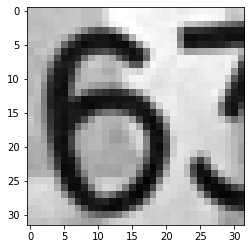

In [93]:
plt.imshow(X_train[1], cmap='gray')

In [94]:
y_train1[1]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [61]:
y_train1.shape

(42000,)

In [0]:
y_train1 = tf.keras.utils.to_categorical(y_train)
y_test1 = tf.keras.utils.to_categorical(y_test)

In [123]:
y_test1

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [0]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

# Initialize Sequential model
model = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 32x32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

In [0]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128, activation='relu'))
#Add 3rd hidden layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(64, activation='relu'))
#Adding Ouput layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [117]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               66048     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 512)               6

Epoch 1/50
1313/1313 [==============================] - 21s 16ms/step - loss: 0.6358 - accuracy: 0.8284 - val_loss: 0.8810 - val_accuracy: 0.7729
Epoch 2/50
1313/1313 [==============================] - 21s 16ms/step - loss: 0.5788 - accuracy: 0.8290 - val_loss: 0.7696 - val_accuracy: 0.7859
Epoch 3/50
1313/1313 [==============================] - 21s 16ms/step - loss: 0.5500 - accuracy: 0.8340 - val_loss: 0.8861 - val_accuracy: 0.7513
Epoch 4/50
1313/1313 [==============================] - 21s 16ms/step - loss: 0.5401 - accuracy: 0.8368 - val_loss: 0.8346 - val_accuracy: 0.7690
Epoch 5/50
1313/1313 [==============================] - 21s 16ms/step - loss: 0.5298 - accuracy: 0.8389 - val_loss: 0.6940 - val_accuracy: 0.8059
Epoch 6/50
1313/1313 [==============================] - 24s 19ms/step - loss: 0.5217 - accuracy: 0.8414 - val_loss: 0.7919 - val_accuracy: 0.7739
Epoch 7/50
1313/1313 [==============================] - 21s 16ms/step - loss: 0.5110 - accuracy: 0.8434 - val_loss: 0.8095 -

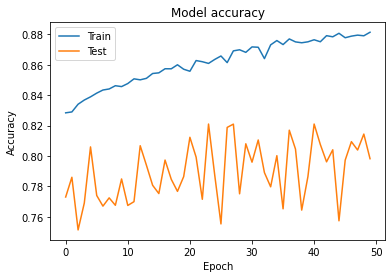

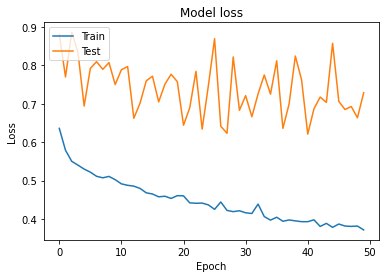

In [118]:
import matplotlib.pyplot as plt

history = model.fit(X_train,y_train1, validation_data=(X_test,y_test1), epochs=50,
          batch_size = 32)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [119]:
y_pred = model.predict_classes(X_test)
y_pred

array([0, 7, 2, ..., 7, 8, 2])

In [128]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred)

array([[1588,   21,   23,   13,   16,    4,   46,   11,   44,   48],
       [  56, 1425,   43,   40,   75,   25,   27,   53,   37,   47],
       [  33,   25, 1481,   27,   26,   19,   18,   77,   41,   56],
       [  37,   22,   58, 1253,   25,  149,   37,   20,   79,   39],
       [  37,   51,   39,   18, 1499,   14,   67,   12,   38,   37],
       [  28,   15,   20,  113,   16, 1363,  119,    4,   44,   46],
       [  35,   21,   18,   19,   29,   60, 1540,    9,   87,   14],
       [  39,   49,   73,   27,   16,    9,   32, 1491,   24,   48],
       [  41,   29,   30,   26,   21,   39,  260,    4, 1319,   43],
       [  83,   33,   42,   23,   22,   55,   40,   19,   79, 1408]])

In [130]:
accuracy_score(y_pred,y_test)

0.7981666666666667